In [1]:
import numpy as np
from astropy.table import Table

from floody import data as D
from floody import floody as F

In [2]:
import corner as DFM
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline 

In [4]:
nyc_prop = Table.read('/scratch/gpfs/chhahn/noah/floody/floody.newyorkcity.v0.hdf5')

In [5]:
nyc = D.read_zipshape(D.CityZipcodes('newyorkcity'))

In [22]:
xlim = (-74.3, -73.675)
ylim = (40.475, 40.95)

cmp = ['Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'PuRd']
lbl = ['Precipitation', 'Flood Risk', 'Income', 'Population', 'Renter Fraction', 'Educational Attainment', r'Racial/Ethnic Diversity']
rng = [(100., 200.), (0., 20.), (5e4, 1e5), (1e4, 1e5), (0., 1.), (0., 1.), (0., 1.)]

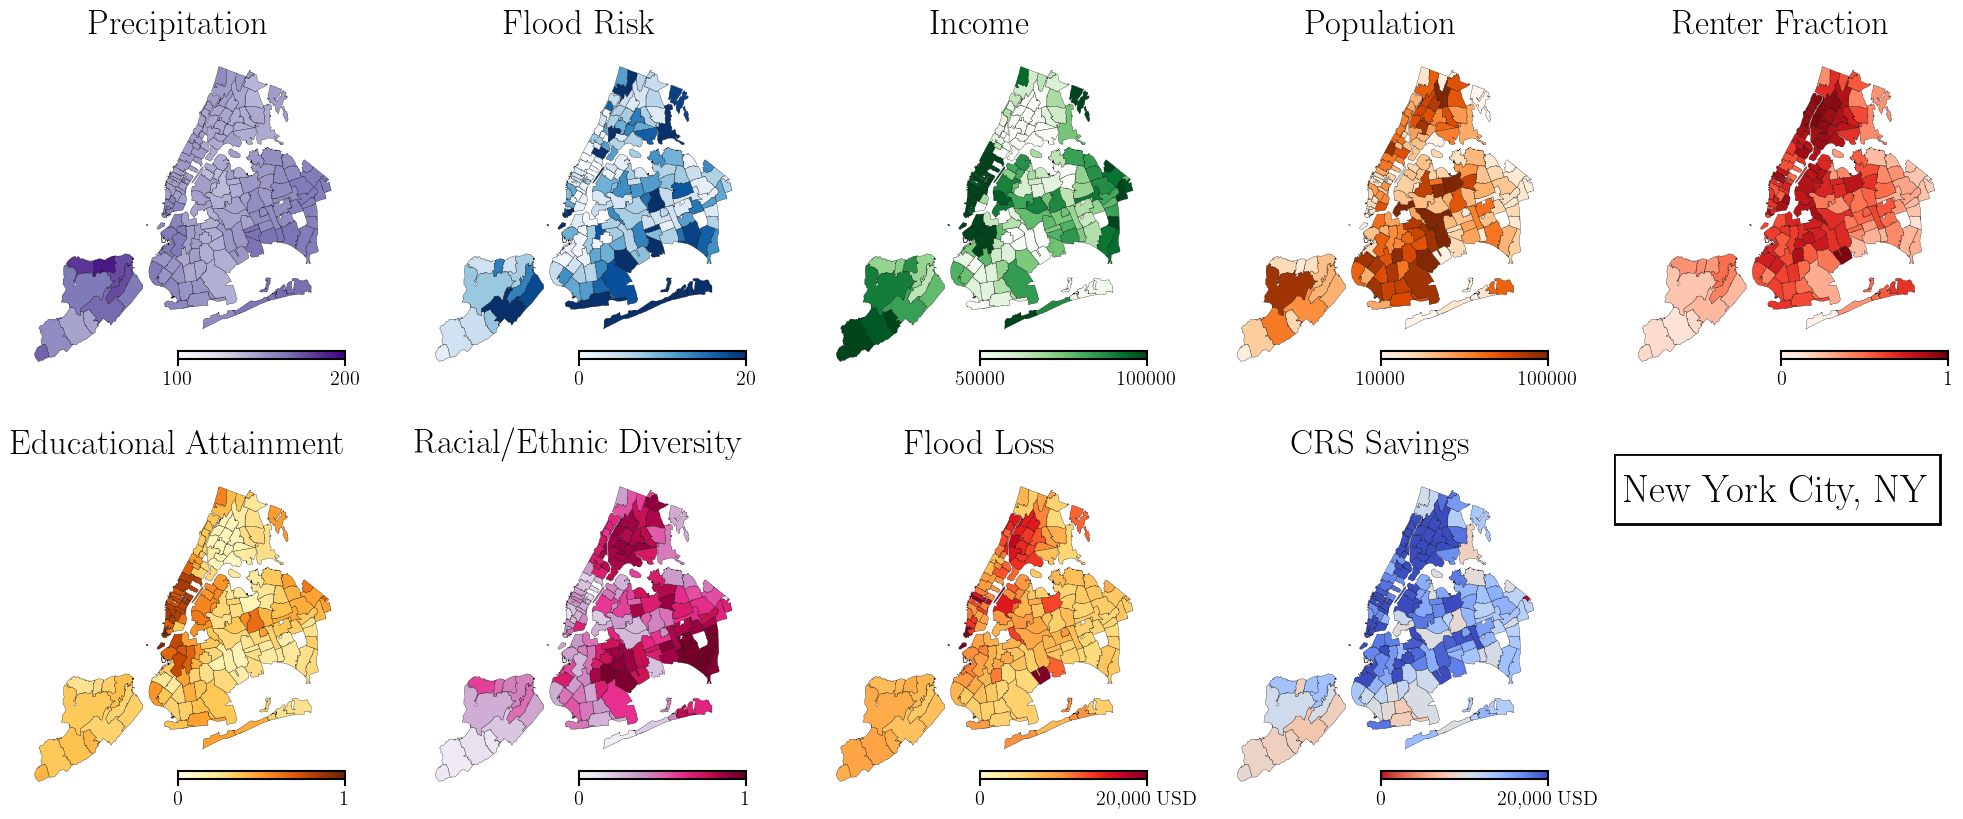

In [44]:
fig = plt.figure(figsize=(25, 10))

for i, col in enumerate(['precip.2022', 'flood_risk100.2022', 'income.2022', 'population.2022', 
                         'renter_fraction.2022', 'educated_fraction.2022', 'white_fraction.2022']):
    ax = fig.add_subplot(2, 5, i+1)

    #print(np.quantile(np.array(nyc_prop[col]), (0.16, 0.5, 0.84)))
    if col == 'white_fraction.2022': nyc['blank'] = 1.-nyc_prop[col]
    else: nyc['blank'] = nyc_prop[col]
    _ = nyc.plot(column='blank', cmap=cmp[i], edgecolor='k', linewidth=0.2, 
                  vmin=rng[i][0], vmax=rng[i][1], ax=ax, 
                  aspect=(xlim[1] - xlim[0])/(ylim[1] - ylim[0]))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_axis_off()
    ax.set_title(lbl[i], fontsize=25)
    
    sc = ax.scatter([], [], c=[], cmap=cmp[i], vmin=rng[i][0], vmax=rng[i][1])
    cbaxes = ax.inset_axes([0.5, 0.05, 0.5, 0.025],
                           transform=ax.transAxes) 
    cbar = plt.colorbar(sc, ticks=[rng[i][0], rng[i][1]], cax=cbaxes, orientation='horizontal')
    #cbar.ax.set_xticklabels(['0', '20,000 USD'])

    
# Flood Losses
ax = fig.add_subplot(2, 5, 8)
nyc['blank'] = nyc_prop['flood_loss.2022']
_ = nyc.plot(column='blank', cmap='YlOrRd', edgecolor='k', linewidth=0.2, 
              vmin=0., vmax=2e4, ax=ax, aspect=(xlim[1] - xlim[0])/(ylim[1] - ylim[0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_axis_off()
ax.set_title('Flood Loss', fontsize=25)
    
sc = ax.scatter([], [], c=[], cmap='YlOrRd', vmin=0, vmax=2e4)
cbaxes = ax.inset_axes([0.5, 0.05, 0.5, 0.025],
                       transform=ax.transAxes) 
cbar = plt.colorbar(sc, ticks=[0, 2e4], cax=cbaxes, orientation='horizontal')
cbar.ax.set_xticklabels(['0', '20,000 USD'])
    
    
# CRS Savings
ax = fig.add_subplot(2, 5, 9)
nyc['blank'] = -nyc_prop['crs_saving.2022'] + 9780.
_ = nyc.plot(column='blank', cmap='coolwarm_r', edgecolor='k', linewidth=0.2, 
              vmin=0, vmax=2e4, ax=ax, aspect=(xlim[1] - xlim[0])/(ylim[1] - ylim[0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_axis_off()
ax.set_title('CRS Savings', fontsize=25)
    
sc = ax.scatter([], [], c=[], cmap='coolwarm_r', vmin=0, vmax=2e4)
cbaxes = ax.inset_axes([0.5, 0.05, 0.5, 0.025],
                       transform=ax.transAxes) 
cbar = plt.colorbar(sc, ticks=[0., 2e4], cax=cbaxes, orientation='horizontal')
cbar.ax.set_xticklabels(['0', '20,000 USD'])    

ax = fig.add_subplot(2,5,10)
ax.text(0.025, 0.94, 'New York City, NY', transform=ax.transAxes, ha='left', va='top', fontsize=28)
rect = patches.Rectangle((0.0, 0.8), 0.975, 0.2, 
                         edgecolor='k', linewidth=2, facecolor='None', transform=ax.transAxes)
ax.add_patch(rect)
ax.set_axis_off()  

fig.savefig('causalflow_demo.pdf', bbox_inches='tight') 